In [1]:
!pip install dtreeviz
!apt-get install graphviz

You should consider upgrading via the '/Users/portia/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
zsh:1: command not found: apt-get


In [2]:
#Import all the required dependencies
import os 
import sys
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image  
import pydotplus

In [3]:
#Import Weather Dataset
weatherdata = os.path.abspath(os.path.join(os.getcwd(), '../Dataset/PredictorFinalWithoutSTDS.csv'))
WeatherData =  pd.read_csv(weatherdata)

In [4]:
WeatherData.drop(['date'], axis = 1, inplace = True)

In [5]:
WeatherData.head()

,d2m_mean,t2m_mean,cvh_mean,cvl_mean,ptype_mean,sf_mean,slt_mean,sp_mean,tp_mean,tvh_mean,...,FIRE_CAUSE_Person,FIRE_CAUSE_Unknown,sat_A,sat_T,season_autumn,season_spring,season_summer,weekday_weekday,weekday_weekend,AoB_Category
0,5.535403,6.268164,0.840935,0.057009,1.000046,0.000019,1.999969,99108.095792,0.000737,2.999908,...,1,0,1,0,0,0,1,1,0,4
1,6.587591,7.625171,0.840935,0.057009,1.000046,0.000000,1.999969,100048.474625,0.000550,2.999908,...,1,0,1,0,0,0,1,1,0,4
2,4.810455,5.797542,0.840935,0.057009,0.875040,0.000000,1.999969,100995.813583,0.000019,2.999908,...,1,0,1,0,0,0,1,1,0,4
3,4.906936,5.822573,0.840935,0.057009,1.000046,0.000000,1.999969,100363.031042,0.000829,2.999908,...,1,0,1,0,0,0,1,1,0,4
4,5.355777,6.168260,0.840935,0.057009,0.916709,0.000000,1.999969,100265.676083,0.000284,2.999908,...,1,0,1,0,0,0,1,1,0,4


In [6]:
WeatherData.rename(columns={'d2m_mean': '2metre_dew_point_mean'
                            , 't2m_mean': '2 metre temperature mean', 'chv_mean': 'Convective heating mean',
                           'cvl_mean': 'Convective cooling Mean', 'ptype_mean': 'Precipitation type', 
                           'sf_mean': 'Snowfall Mean', 'tp_mean': 'Total precipitation Mean', 
                           'tvh_mean': 'Tropospheric vertical velocity Mean','slt_mean': 'Soil temperature Mean'}, inplace=True)

In [7]:
WeatherData.columns

Index(['2metre_dew_point_mean', '2 metre temperature mean', 'cvh_mean',
       'Convective cooling Mean', 'Precipitation type', 'Snowfall Mean',
       'Soil temperature Mean', 'sp_mean', 'Total precipitation Mean',
       'Tropospheric vertical velocity Mean', 'wind_speed_mean', 'Total_AoB',
       'T21_mean', 'T31_mean', 'sample_mean', 'FRP_mean', 'conf_mean',
       'min_dist_to_roads', 'distance_to_firecenter', 'FIRE_CAUSE_Lightning',
       'FIRE_CAUSE_Person', 'FIRE_CAUSE_Unknown', 'sat_A', 'sat_T',
       'season_autumn', 'season_spring', 'season_summer', 'weekday_weekday',
       'weekday_weekend', 'AoB_Category'],
      dtype='object')

In [8]:
WeatherData.head()

,2metre_dew_point_mean,2 metre temperature mean,cvh_mean,Convective cooling Mean,Precipitation type,Snowfall Mean,Soil temperature Mean,sp_mean,Total precipitation Mean,Tropospheric vertical velocity Mean,...,FIRE_CAUSE_Person,FIRE_CAUSE_Unknown,sat_A,sat_T,season_autumn,season_spring,season_summer,weekday_weekday,weekday_weekend,AoB_Category
0,5.535403,6.268164,0.840935,0.057009,1.000046,0.000019,1.999969,99108.095792,0.000737,2.999908,...,1,0,1,0,0,0,1,1,0,4
1,6.587591,7.625171,0.840935,0.057009,1.000046,0.000000,1.999969,100048.474625,0.000550,2.999908,...,1,0,1,0,0,0,1,1,0,4
2,4.810455,5.797542,0.840935,0.057009,0.875040,0.000000,1.999969,100995.813583,0.000019,2.999908,...,1,0,1,0,0,0,1,1,0,4
3,4.906936,5.822573,0.840935,0.057009,1.000046,0.000000,1.999969,100363.031042,0.000829,2.999908,...,1,0,1,0,0,0,1,1,0,4
4,5.355777,6.168260,0.840935,0.057009,0.916709,0.000000,1.999969,100265.676083,0.000284,2.999908,...,1,0,1,0,0,0,1,1,0,4


### *Note* 



D2M: This stands for dew point temperature, which is the temperature to which air must be cooled in order to reach saturation (e.g. 100% relative humidity).

T2M: This stands for temperature at 2 meters, which is the air temperature measured at a height of 2 meters above the ground.

CVH: This stands for cloud amount in high clouds.

CVL: This stands for cloud amount in low clouds.

PTYPE: This stands for precipitation type. It indicates the type of precipitation falling at the time of the measurement (e.g. rain, snow, hail).

SF: This stands for snowfall, which is the amount of snowfall in the form of liquid water equivalent.

SLT: This stands for surface latent heat flux, which is the amount of energy released as a result of condensation or evaporation at the Earth’s surface.

SP: This stands for surface pressure, which is the atmospheric pressure at the Earth’s surface.

TP: This stands for total precipitation, which is the amount of precipitation in the form of liquid water equivalent.

TVH: This stands for total vertical velocity at 500 hPa, which is the average vertical velocity of air parcels in the atmosphere at 500 hPa (about 5.5 km above the Earth’s surface).

T21: This stands for temperature at 21 meters, which is the air temperature measured at a height of 21 meters above the ground.

T31: This stands for temperature at 31 meters, which is the air temperature measured at a height of 31 meters above the ground.

Sample: This stands for sampling, which is the process of collecting and analyzing data from a subset of a population to draw conclusions about the entire population.

FRP: This stands for fire radiative power, which is the total amount of energy released by a fire in the form of radiation.

In [9]:
# Calculate the correlation values
feature_cols = WeatherData.columns[:-1]
corr_values = WeatherData[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [10]:
feature_cols

Index(['2metre_dew_point_mean', '2 metre temperature mean', 'cvh_mean',
       'Convective cooling Mean', 'Precipitation type', 'Snowfall Mean',
       'Soil temperature Mean', 'sp_mean', 'Total precipitation Mean',
       'Tropospheric vertical velocity Mean', 'wind_speed_mean', 'Total_AoB',
       'T21_mean', 'T31_mean', 'sample_mean', 'FRP_mean', 'conf_mean',
       'min_dist_to_roads', 'distance_to_firecenter', 'FIRE_CAUSE_Lightning',
       'FIRE_CAUSE_Person', 'FIRE_CAUSE_Unknown', 'sat_A', 'sat_T',
       'season_autumn', 'season_spring', 'season_summer', 'weekday_weekday',
       'weekday_weekend'],
      dtype='object')

In [11]:
corr_values

,feature1,feature2,correlation,abs_correlation
0,2metre_dew_point_mean,2 metre temperature mean,0.976565,0.976565
1,2metre_dew_point_mean,cvh_mean,-0.115935,0.115935
2,2metre_dew_point_mean,Convective cooling Mean,0.088495,0.088495
3,2metre_dew_point_mean,Precipitation type,0.011742,0.011742
4,2metre_dew_point_mean,Snowfall Mean,0.190483,0.190483
...,...,...,...,...
401,season_spring,weekday_weekday,0.096801,0.096801
402,season_spring,weekday_weekend,-0.096801,0.096801
403,season_summer,weekday_weekday,-0.002314,0.002314
404,season_summer,weekday_weekend,0.002314,0.002314


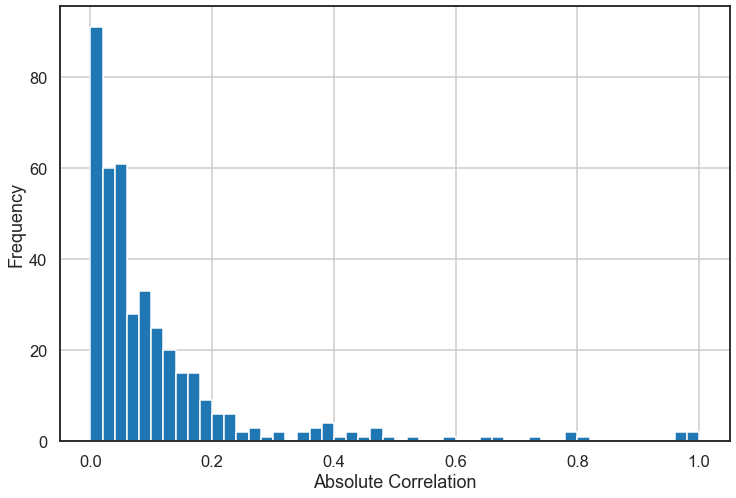

In [12]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import log_loss

In [14]:
X = WeatherData.drop('AoB_Category', axis = 1)
y = WeatherData['AoB_Category']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [15]:
# from sklearn.model_selection import StratifiedShuffleSplit

# # Get the split indexes
# strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
#                                           test_size=0.3, 
#                                           random_state=42)

# train_idx, test_idx = next(strat_shuf_split.split(WeatherData[feature_cols], WeatherData.AoB_Category))

# # Create the dataframes
# X_train = WeatherData.loc[train_idx, feature_cols]
# y_train = WeatherData.loc[train_idx, 'AoB_Category']

# X_test  = WeatherData.loc[test_idx, feature_cols]
# y_test  = WeatherData.loc[test_idx, 'AoB_Category']

In [16]:
y_train.value_counts(normalize=True).sort_index()

0    0.040515
1    0.286090
2    0.190351
3    0.008201
4    0.474842
Name: AoB_Category, dtype: float64

In [17]:
y_test.value_counts(normalize = True).sort_index()

0    0.041519
1    0.284837
2    0.195304
3    0.008075
4    0.470266
Name: AoB_Category, dtype: float64

In [18]:
WeatherData.AoB_Category.value_counts()

4    35960
1    21700
2    14570
0     3100
3      620
Name: AoB_Category, dtype: int64

#### K-Nearest 

In [19]:
pipe_knn = Pipeline(steps=[
    ("scaler", StandardScaler()), 
    ("knn", KNeighborsClassifier())
])

params_knn = {
    'knn__n_neighbors':range(5, 10, 5), 
    'knn__algorithm':['auto'], 
    'knn__p':[1, 2]
}

search_knn = RandomizedSearchCV(pipe_knn, params_knn, scoring='accuracy', cv=3, refit=True, n_iter=2, verbose = 2)

search_knn.fit(X_train, y_train)
y_hat_knn = search_knn.predict(X_test)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END ..knn__algorithm=auto, knn__n_neighbors=5, knn__p=1; total time=  23.4s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=5, knn__p=1; total time=  23.8s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=5, knn__p=1; total time=  23.5s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=5, knn__p=2; total time=  12.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=5, knn__p=2; total time=  12.4s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=5, knn__p=2; total time=  12.4s


In [20]:
display(search_knn.best_params_)
display(search_knn.best_score_)

{'knn__p': 1, 'knn__n_neighbors': 5, 'knn__algorithm': 'auto'}

0.9975547805108512

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='micro'),
                      'recall': recall_score(y_true, y_pred, average='micro'),
                      'f1': f1_score(y_true, y_pred, average='micro')},
                      name=label)

In [22]:

y_train_pred = search_knn.predict(X_train)
y_test_pred = search_knn.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.998683,0.997849
precision,0.998683,0.997849
recall,0.998683,0.997849
f1,0.998683,0.997849


#### Decision Tree

In [23]:

tree_clf = DecisionTreeClassifier(max_depth=2, random_state = 42)
tree_clf.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=2, random_state=42)

In [24]:

y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.951284,0.950406
precision,0.951284,0.950406
recall,0.951284,0.950406
f1,0.951284,0.950406


#### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(max_depth = 2, random_state = 42)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [26]:
from sklearn.metrics import accuracy_score
y_pred = rand_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8204520517884574

In [27]:
# The error on the training and test data sets
y_train_pred = rand_clf.predict(X_train)
y_test_pred = rand_clf.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error


,train,test
accuracy,0.831205,0.820452
precision,0.831205,0.820452
recall,0.831205,0.820452
f1,0.831205,0.820452


Theres a high chance of overfitting 

In [28]:
rand_clf.feature_importances_

array([3.70197159e-03, 2.48991630e-03, 3.96912260e-02, 7.79389818e-02,
       0.00000000e+00, 0.00000000e+00, 3.81861033e-02, 6.06605847e-02,
       1.16829650e-03, 5.84057880e-04, 0.00000000e+00, 2.86362804e-01,
       5.76604979e-02, 4.26677740e-02, 9.54569935e-03, 1.49638325e-01,
       2.25324938e-02, 5.42983076e-02, 1.22475365e-01, 5.94197172e-03,
       6.38093263e-04, 1.75915196e-04, 0.00000000e+00, 2.08307148e-04,
       2.46179374e-03, 1.75316759e-02, 2.49472835e-03, 9.45109514e-04,
       0.00000000e+00])

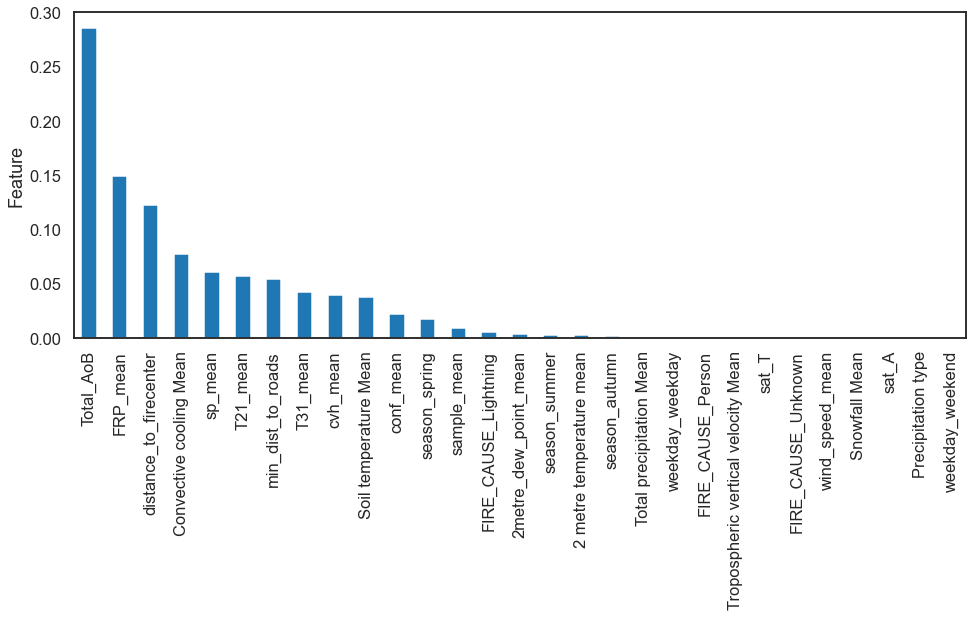

In [29]:
feature_col = WeatherData.columns[:-1]
feature_imp = pd.Series(rand_clf.feature_importances_, index=feature_col).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');

Make sense that total area burn amd fire radiation power and distance to fire is the most important in fire category predictions

Feels like this a data leakage somewhere beacause total area burnt

In [30]:
#Funtion to create each column feature importance and sort it
def imp_df(column_names, importances):
    df = pd.DataFrame({"feature": column_names, "feature_importance": importances})
    df.sort_values("feature_importance", ascending = False, inplace = True)
    df.reset_index(drop = True, inplace = True)
    return df

In [31]:
from sklearn.base import clone 

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train.columns, importances)
    return importances_df

In [32]:
drop_col_feat_imp(rand_clf, X_train, y_train)

,feature,feature_importance
0,Total_AoB,0.278604
1,T21_mean,-0.015066
2,Tropospheric vertical velocity Mean,-0.016834
3,FRP_mean,-0.018057
4,Total precipitation Mean,-0.020408
5,wind_speed_mean,-0.020408
6,cvh_mean,-0.020747
7,Convective cooling Mean,-0.020747
8,Soil temperature Mean,-0.020747
9,sp_mean,-0.020747


<AxesSubplot:>

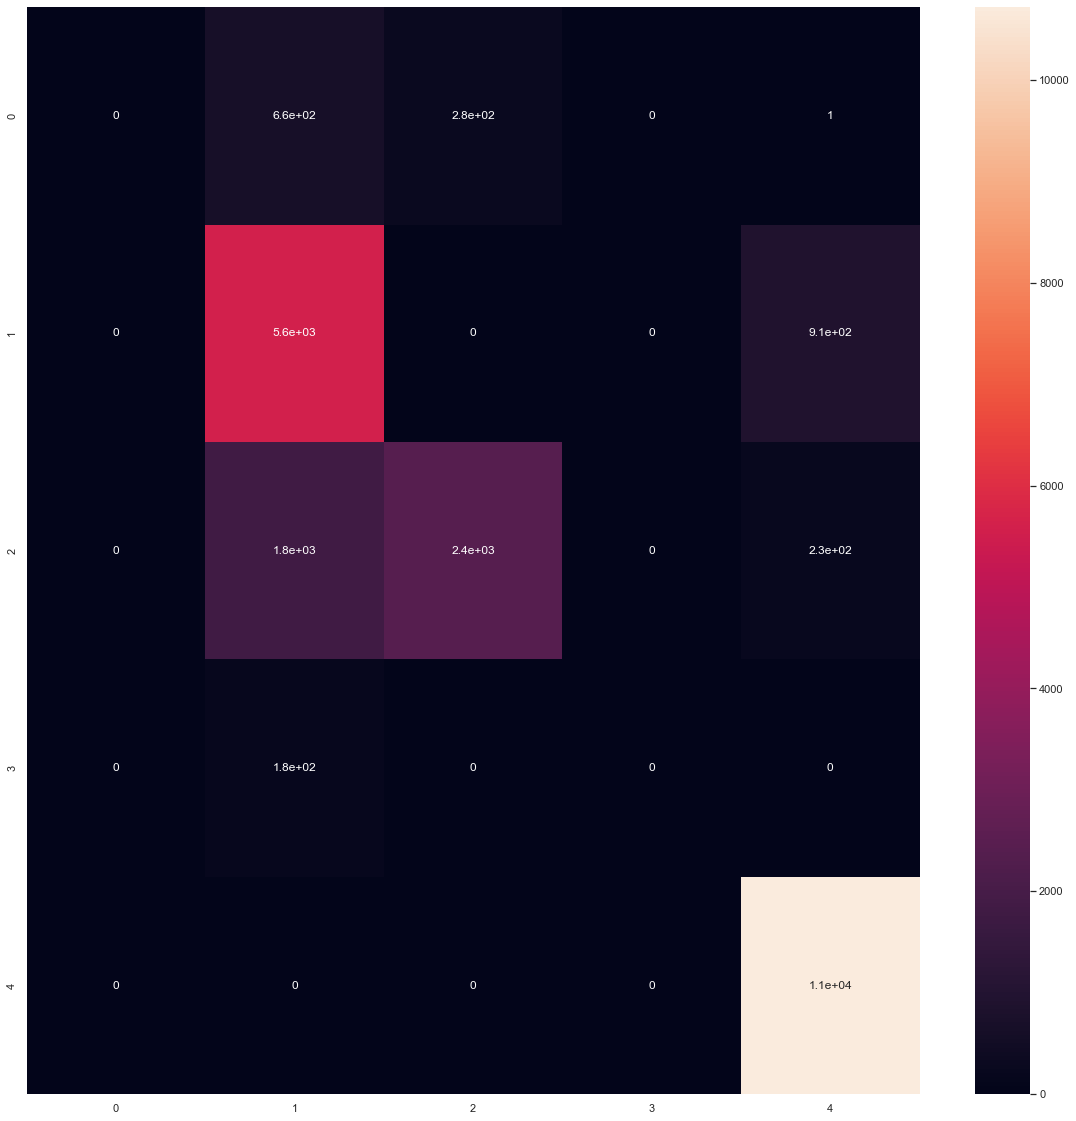

In [33]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(confusion_matrix(y_test, rand_clf.predict(X_test)), annot = True)

In [47]:
from sklearn.model_selection import GridSearchCV

# Initialize the model 
clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5, min_samples_split=2)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object with the training data
grid_search.fit(X_train, y_train)

# Print the best parameters from the grid search
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 100}


In [35]:
grid_predictions = grid_search.predict(X_test)

print(classification_report(y_test, grid_predictions)) 

In [36]:
X_train.columns

Index(['2metre_dew_point_mean', '2 metre temperature mean', 'cvh_mean',
       'Convective cooling Mean', 'Precipitation type', 'Snowfall Mean',
       'Soil temperature Mean', 'sp_mean', 'Total precipitation Mean',
       'Tropospheric vertical velocity Mean', 'wind_speed_mean', 'Total_AoB',
       'T21_mean', 'T31_mean', 'sample_mean', 'FRP_mean', 'conf_mean',
       'min_dist_to_roads', 'distance_to_firecenter', 'FIRE_CAUSE_Lightning',
       'FIRE_CAUSE_Person', 'FIRE_CAUSE_Unknown', 'sat_A', 'sat_T',
       'season_autumn', 'season_spring', 'season_summer', 'weekday_weekday',
       'weekday_weekend'],
      dtype='object')

Random forest is overfitting so i will try and fit it on bagging 

In [37]:
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

[[  946     0     0     0     0]
 [    0  6490     0     0     0]
 [    0     0  4450     0     0]
 [    0     0     0   184     0]
 [    0     0     0     0 10715]]


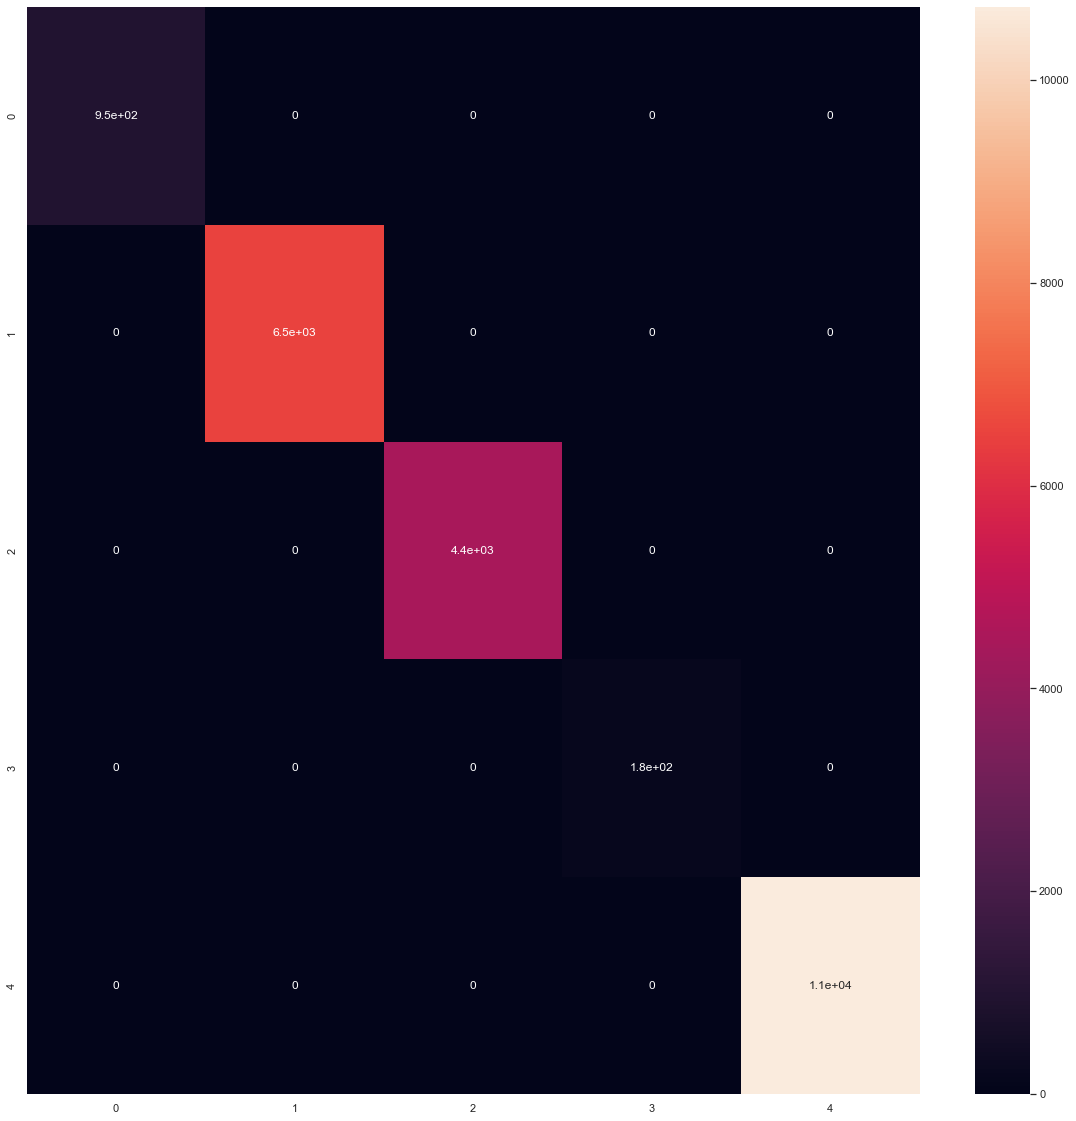

In [38]:
print(confusion_matrix(y_test, grid_search.predict(X_test)))
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(confusion_matrix(y_test, grid_search.predict(X_test)), annot = True)
plt.show()

In [39]:
from sklearn.model_selection import cross_val_score
rf_score = cross_val_score(grid_search, X_train, y_train)
rf_score.mean()

1.0

In [40]:
WeatherData.head()

,2metre_dew_point_mean,2 metre temperature mean,cvh_mean,Convective cooling Mean,Precipitation type,Snowfall Mean,Soil temperature Mean,sp_mean,Total precipitation Mean,Tropospheric vertical velocity Mean,...,FIRE_CAUSE_Person,FIRE_CAUSE_Unknown,sat_A,sat_T,season_autumn,season_spring,season_summer,weekday_weekday,weekday_weekend,AoB_Category
0,5.535403,6.268164,0.840935,0.057009,1.000046,0.000019,1.999969,99108.095792,0.000737,2.999908,...,1,0,1,0,0,0,1,1,0,4
1,6.587591,7.625171,0.840935,0.057009,1.000046,0.000000,1.999969,100048.474625,0.000550,2.999908,...,1,0,1,0,0,0,1,1,0,4
2,4.810455,5.797542,0.840935,0.057009,0.875040,0.000000,1.999969,100995.813583,0.000019,2.999908,...,1,0,1,0,0,0,1,1,0,4
3,4.906936,5.822573,0.840935,0.057009,1.000046,0.000000,1.999969,100363.031042,0.000829,2.999908,...,1,0,1,0,0,0,1,1,0,4
4,5.355777,6.168260,0.840935,0.057009,0.916709,0.000000,1.999969,100265.676083,0.000284,2.999908,...,1,0,1,0,0,0,1,1,0,4


In [41]:
from sklearn.ensemble import BaggingClassifier

# Create base estimator
dt = DecisionTreeClassifier(max_depth=2)

# Create bagging classifier
bag_clf = BaggingClassifier(base_estimator=dt, n_estimators=7, 
                            max_samples=0.2, bootstrap=True, 
                            random_state=42, n_jobs=-1)

# Fit and predict
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [42]:
# The error on the training and test data sets
y_train_pred = bag_clf.predict(X_train)
y_test_pred = bag_clf.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.951284,0.950406
precision,0.951284,0.950406
recall,0.951284,0.950406
f1,0.951284,0.950406


Boosting

In [48]:

from sklearn.ensemble import GradientBoostingClassifier

# Create boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=3, learning_rate=00.1, 
                                    max_depth=2, random_state=42)

# Fit and predict
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

In [49]:
# The error on the training and test data sets
y_train_pred = gb_clf.predict(X_train)
y_test_pred = gb_clf.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,1.0
precision,1.0,1.0
recall,1.0,1.0
f1,1.0,1.0
